# Teleportacja Kwantowa


### **Założenia protokołu**

Teleportacja kwantowa to protokół, który umożliwia przesłanie *nieznanego stanu kwantowego* z jednej strony (Alice) do drugiej (Bob), *bez fizycznego przesyłania kubitu*. W tym procesie wykorzystywane są zasoby splątania kwantowego oraz klasyczna komunikacja.  

W tym scenariuszu wprowadzamy zaufaną trzecią stronę – **Trenta**, który przygotowuje i rozdziela *splątaną parę kubitów (parę EPR)* pomiędzy Alice i Boba.

**Założenia:**

1. Trent generuje parę splątanych kubitów $|\beta_{00}\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$.
2. Kubit A (z tej pary) trafia do Alice, a kubit B – do Boba.
3. Alice posiada dodatkowy kubit $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$, którego stan chce przekazać Bobowi.
4. Alice i Bob **mogą komunikować się tylko klasycznie** (np. za pomocą telefonu).
5. Alice **nie zna** stanu $|\psi\rangle$ – nie może go więc po prostu skopiować.

### **Spodziewany efekt**

Po zakończeniu protokołu:

- **Kubit Boba** (ten z pary EPR) znajduje się **dokładnie w stanie** $|\psi\rangle$, który wcześniej miała Alice.
- **Oryginalny kubit Alice** nie zawiera już informacji o $|\psi\rangle$ – teleportacja nie oznacza duplikacji.
- Stan został przeniesiony **bez przesyłania fizycznego nośnika kwantowego**, a jedynie przy pomocy klasycznych bitów i wcześniej przygotowanego splątania.

### **Kroki protokołu teleportacji kwantowej**

**Oznaczenia:**
- $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ – stan do teleportacji (na kubicie `Q0`).
- $|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ – para EPR (kubit `Q1` u Alice, `Q2` u Boba).

#### Krok 1: Generacja pary EPR przez Trenta
- Trent przygotowuje splątany stan dwóch kubitów $|\Phi^+\rangle$.
- Wysyła jeden z kubitów (A) do Alice i drugi (B) do Boba.

#### Krok 2: Alice łączy stan wejściowy z kubitem EPR
- Alice ma dwa kubity:
  - `Q0`: stan $|\psi\rangle$
  - `Q1`: kubit A pary EPR
- Alice wykonuje:
  1. bramkę **CNOT(Q0 -> Q1)**,
  2. bramkę **Hadamard na Q0**.

#### Krok 3: Pomiar i klasyczna transmisja
- Alice **mierzy** kubity Q0 i Q1 w bazie obliczeniowej (|0⟩, |1⟩).
- Otrzymuje wynik dwóch klasycznych bitów: $b_0, b_1 \in \{0,1\}$.
- Wysyła te dwa bity do Boba klasycznym kanałem.

#### Krok 4: Korekcja u Boba
- Bob, po otrzymaniu bitów od Alice:
  - jeśli $b_1 = 1$, stosuje bramkę **X**,
  - jeśli $b_0 = 1$, stosuje bramkę **Z**.
- Po tych operacjach jego kubit (Q2) przyjmuje stan dokładnie $|\psi\rangle$.

---

Teleportacja kwantowa pozwala "przenieść" nieznany stan kwantowy z jednego miejsca do drugiego, **bez kopiowania** i **bez fizycznego przenoszenia cząstki**, ale przy wykorzystaniu wcześniej rozdzielonego splątania i klasycznej komunikacji.

Zaufana strona (Trent) może działać jako inicjator systemu – zapewniając wiarygodną i jednoczesną dystrybucję pary EPR do uczestników, co czyni cały protokół bardziej realistycznym w kontekście sieci kwantowych lub przyszłego "kwantowego internetu".

## Prosta symulacja działania protokołu

### Krok 0: Przygotowanie obwodu

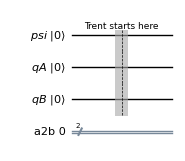

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qpsi = QuantumRegister(1, 'psi')
qA = QuantumRegister(1, 'qA')
qB = QuantumRegister(1, 'qB')

a2b = ClassicalRegister(2, 'a2b')
qc = QuantumCircuit(qpsi, qA, qB, a2b)
qc.barrier(label="Trent starts here")
qc.draw('mpl',scale=0.5,initial_state=True)

### Krok 1: Generacja pary EPR przez Trenta
- Trent przygotowuje splątany stan dwóch kubitów $|\beta_{0,0}\rangle$.
- Wysyła jeden z kubitów (A) do Alice i drugi (B) do Boba.

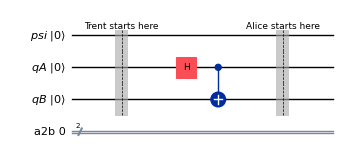

In [3]:
qc.h(qA)
qc.cx(qA,qB)
qc.draw('mpl')
qc.barrier(label="Alice starts here")
qc.draw('mpl',scale=0.5,initial_state=True)

#### Krok 2: Alice wykonuje pomiar Bell'a
- Alice ma dwa kubity:
  - Q0: stan $|\psi\rangle$
  - Q1: kubit A pary EPR
- Alice wykonuje Bell'a posiadanych:
  1. bramkę **CNOT(Q0 → Q1)**,
  2. bramkę **Hadamard na Q0**.
  - Alice **mierzy** kubity Q0 i Q1 w bazie obliczeniowej (|0⟩, |1⟩) i wynik umieszcza w bitach klasycznych b[0] i b[1]


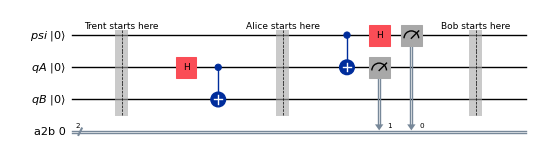

In [4]:
qc.cx(qpsi, qA)
qc.h(qpsi)
qc.measure(qpsi, a2b[0])
qc.measure(qA, a2b[1])
qc.barrier(label="Bob starts here")
qc.draw('mpl',scale=0.5,initial_state=True)

#### Krok 3: Klasyczna transmisja
- Wynikiem pomiaru są dwa klasyczne bity: $b_0, b_1 \in \{0,1\}$.
- Alice wysyła te dwa bity do Boba klasycznym kanałem.



#### Krok 4: Korekcja u Boba
- Bob, po otrzymaniu bitów od Alice:
  - jeśli $b_1 = 1$, stosuje bramkę **X** do swojego qubitu `Q2`,
  - jeśli $b_0 = 1$, stosuje bramkę **Z** do swojego qubitu `Q2`.
- Po tych operacjach jego kubit (`Q2`) przyjmuje stan dokładnie $|\psi\rangle$.

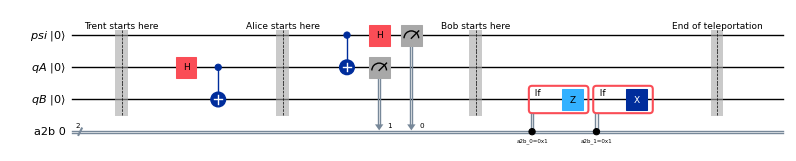

In [5]:
with qc.if_test((a2b[0], 1)):
    qc.z(qB)
with qc.if_test((a2b[1], 1)):
    qc.x(qB)
qc.barrier(label="End of teleportation")
qc.draw('mpl',scale=0.5,initial_state=True)

### Proste sprawdzenie poprawności

Stan wejściowy to $\ket{0}$, zatem `SamplerV2` powinien zawsze wskazać 0.

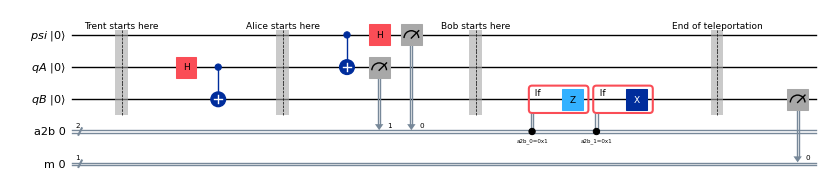

In [6]:
m = ClassicalRegister(1, 'm')
# kopia obwodu teleportacji z dodanym pomiarem qB na m, aby spełnić wymogi Samplera.
sampler_circuit = qc.copy()
sampler_circuit.add_register(m)
sampler_circuit.measure(qB, m[0])
sampler_circuit.draw('mpl',scale=0.5,initial_state=True)

Symulacja działania obwodu. Używamy Aer i SamplerV2, aby mieć zgodność interfejsu z `qiskit_ibm_runtime`.

In [7]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as AerSampler
backend = AerSimulator()
sampler_aer = AerSampler()
job_aer=sampler_aer.run([sampler_circuit], shots=1000)
result_aer=job_aer.result()

Wizualizacja otrzymanych wyników. Na histogramie wszystkie wyniki pomiarów powinny być skupione wokół `0`.

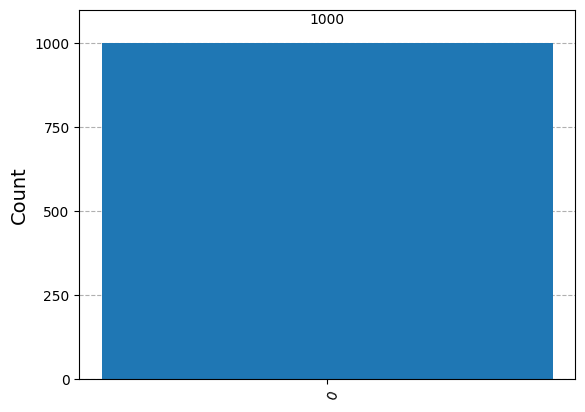

In [8]:
from qiskit.visualization import plot_histogram
counts_aer = result_aer[0].data.m.get_counts()
plot_histogram(counts_aer)

## Blokowe sformułowanie protokołu

Procedury generacji pary EPR i identyfikacji jej typu

In [9]:
def bell_subcircuit(name="BellCircuit"):
    qc = QuantumCircuit(2, name=name)
    qc.h(0)
    qc.cx(0, 1)
    return qc.to_instruction()

def bell_measurement_subcircuit(name="BellMeasurementCircuit"):
    qc = QuantumCircuit(2, name=name)
    qc.cx(0, 1)
    qc.h(0)
    return qc.to_instruction()

Protokół przepisany przy ich użyciu

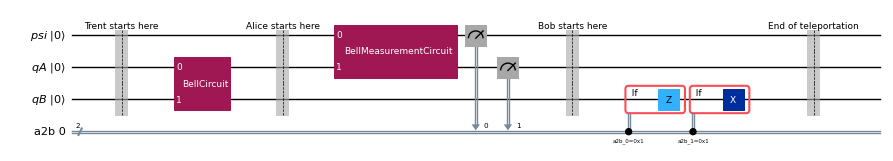

In [10]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

bell_gate = bell_subcircuit()
bell_measurement = bell_measurement_subcircuit()

qpsi = QuantumRegister(1, 'psi')
qA = QuantumRegister(1, 'qA')
qB = QuantumRegister(1, 'qB')

a2b = ClassicalRegister(2, 'a2b')
qc = QuantumCircuit(qpsi, qA, qB, a2b)
qc.barrier(label="Trent starts here")
qc.append(bell_gate, [qA, qB])
qc.barrier(label="Alice starts here")
qc.append(bell_measurement, [qpsi, qA])
qc.measure(qpsi, a2b[0])
qc.measure(qA, a2b[1])
qc.barrier(label="Bob starts here")
with qc.if_test((a2b[0], 1)):
    qc.z(qB)
with qc.if_test((a2b[1], 1)):
    qc.x(qB)
qc.barrier(label="End of teleportation")
qc.draw('mpl',scale=0.5,initial_state=True)

Sprawdzenie.

> **Uwaga!** Tym raze Aer wymaga transpilacji bo nie ma zaimplementowanych bramek `BellCircuit` i `BellMeasurementCircuit`.

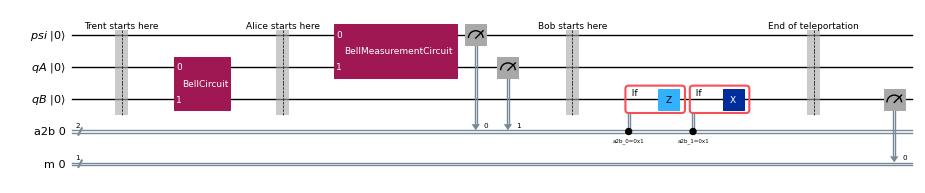

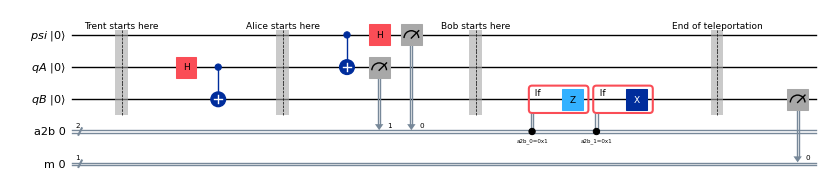

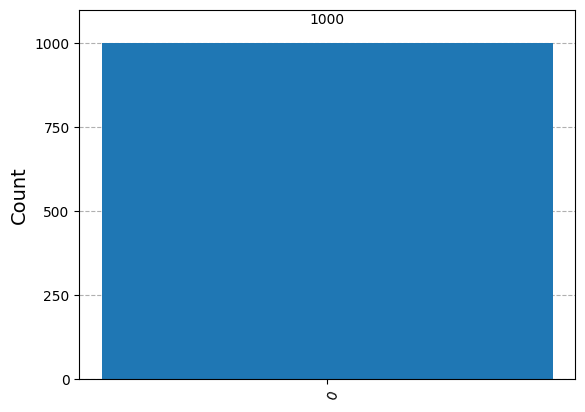

In [11]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as AerSampler
from qiskit import transpile
backend = AerSimulator()
sampler_aer = AerSampler()

m = ClassicalRegister(1, 'm')
sampler_circuit = qc.copy() ;
sampler_circuit.add_register(m)
sampler_circuit.measure(qB, m[0])

qc_aer = transpile(sampler_circuit, backend=backend)

job_aer=sampler_aer.run([qc_aer], shots=1000)
result_aer=job_aer.result()
from qiskit.visualization import plot_histogram
counts_aer = result_aer[0].data.m.get_counts()
display(sampler_circuit.draw('mpl',scale=0.5,initial_state=True,fold=-1))
display(qc_aer.draw('mpl',scale=0.5,initial_state=True))
display(plot_histogram(counts_aer))

## Uogólnienie na dowolny stan wejściowy

Dowolny stan wejściowy można uzyskać stosując przed teleportacją losową transformację unitarną do kubitu $\ket{\psi}$.
Za pomocą funkcji `random_unitary(2)` z modułu `qiskit.quantum_info` generujemy losową macierz 2×2 z rozkładem Haar'a (płaski rozkład wśród macierzy unitarnych). Następnie, przy użyciu klasy `OnekubitEulerDecomposer` dekomponujemy tę macierz do postaci parametrycznej $U3(\theta, \phi, \lambda)$. Teraz trójka parametrów $\theta$, $\phi$, $\lambda$ w pełni opisuje macierz, bowiem każdą macierz unitarną 2x2 da się sprowadzić do postaci

$$
U(\theta,\phi,\lambda) = \begin{pmatrix}
\cos\frac{\theta}{2} & -e^{i\lambda}\sin\frac{\theta}{2} \\
e^{i\phi}\sin\frac{\theta}{2} & e^{i(\phi+\lambda)}\cos\frac{\theta}{2}
\end{pmatrix}
$$


Ta postać odpowiada bramce \(U3(\theta,\phi,\lambda)\) stosowanej w Qiskit.

Po standardowej teleportacji aplikujemy na kubicie `qB` transformację odwrotną, czyli $U3(–θ, –λ, –φ)$. Jeśli teleportacja działa poprawnie, stan na `qB` powinien zostać przywrócony do $\ket{0}$, co potwierdzamy pomiarem.

> Dlaczego po prostu nie wygenerować losowej bramki korzystając z `random_untary` a poźniej nie zastosować do niej operacji sprzężenia hermitowskiego. Po co dokonywać dekompozycji na parametry $\phi$,$\theta$,$\lambda$?

Oba podejścia są teoretycznie poprawne, jednak wybór dekompozycji do parametrów U3 jest podyktowany względami praktycznymi. Bramka $U3$ jest zwykle natywnie wspierana przez sprzętowe backendy IBM Quantum. Jeśli użyjemy bezpośrednio losowej bramki (jako ogólnej macierzy unitarnej) i jej sprzężenia hermitowskiego, to transpiler będzie musiał rozłożyć tę ogólną bramkę na natywne operacje. Dekompozycja do postaci U3 zapewnia, że obwód jest już zoptymalizowany pod kątem zestawu bramek efektywnie realizowalnych w sprzęcie.


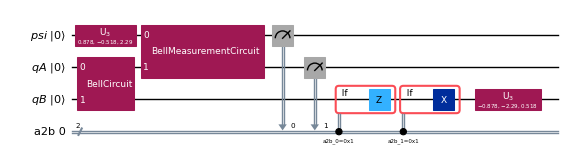

In [12]:
from qiskit.quantum_info import random_unitary
from qiskit.circuit.library import U3Gate
from qiskit.synthesis import OneQubitEulerDecomposer

# Generujemy losową macierz unarną dla jednego kubitu
rand_unitary = random_unitary(2)

# Używamy OnekubitEulerDecomposer do dekompozycji do postaci U3(θ, φ, λ)
decomposer = OneQubitEulerDecomposer(basis="U3")
theta_val, phi_val, lam_val = decomposer.angles(rand_unitary)
bell_gate = bell_subcircuit()
bell_measurement = bell_measurement_subcircuit()

qpsi = QuantumRegister(1, 'psi')
qA = QuantumRegister(1, 'qA')
qB = QuantumRegister(1, 'qB')

a2b = ClassicalRegister(2, 'a2b')
qc00 = QuantumCircuit(qpsi, qA, qB, a2b)

# dowolny stan wejściowy
qc00.append(U3Gate(theta_val, phi_val, lam_val), [qpsi])
# para EPR wygenerowana przez Trenta
qc00.append(bell_gate, [qA, qB])
# teleportacja, część Alice
qc00.append(bell_measurement, [qpsi, qA])
qc00.measure(qpsi, a2b[0])
qc00.measure(qA, a2b[1])
# teleportacja, część Bob'a
with qc00.if_test((a2b[0], 1)):
    qc00.z(qB)
with qc00.if_test((a2b[1], 1)):
    qc00.x(qB)
# tu powinien być dowolny stan \psi=U3(θ, φ, λ)|0>. 
# Stosujemy transformację odwrotną do U3(θ, φ, λ)
# (U3(θ, φ, λ))^(-1) = U3(-θ, -λ, -φ), zwróć uwagę na na zmianę znaków i kolejność argumentów
qc00.append(U3Gate(-theta_val, -lam_val, -phi_val), [qB])
qc00.draw('mpl',scale=0.5,initial_state=True)

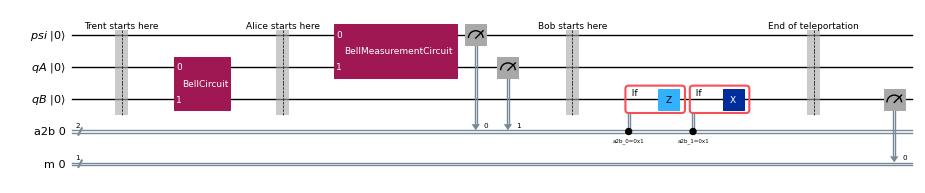

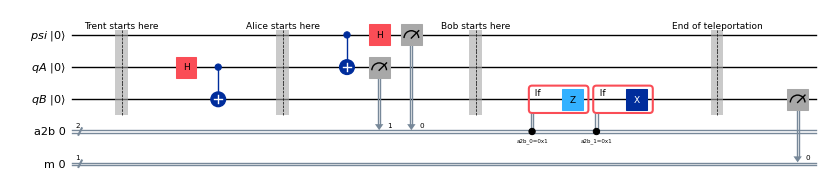

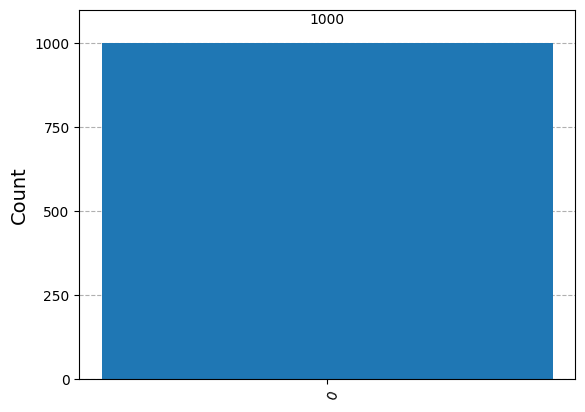

In [13]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as AerSampler
from qiskit import transpile
backend = AerSimulator()
sampler_aer = AerSampler()

m = ClassicalRegister(1, 'm')
qc00_for_sampler = qc00.copy() ;
qc00_for_sampler.add_register(m)
qc00_for_sampler.measure(qB, m[0])
qc00_aer = transpile(qc00_for_sampler, backend=backend)

job_aer=sampler_aer.run([qc00_aer], shots=1000)
result_aer=job_aer.result()
from qiskit.visualization import plot_histogram
counts_aer = result_aer[0].data.m.get_counts()
display(sampler_circuit.draw('mpl',scale=0.5,initial_state=True,fold=-1))
display(qc_aer.draw('mpl',scale=0.5,initial_state=True))
display(plot_histogram(counts_aer))

### Sprawdzenie na komputerze kwantowym

1. Pobranie dostępnej jednostki wykonawczej

In [16]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
backend_qpu = service.least_busy(simulator=False, operational=True)
print(backend_qpu.name, " num qubits:", backend_qpu.configuration().n_qubits)

ibm_brisbane  num qubits: 127


2. Transpilacja i zlecenia zadania

In [17]:
from qiskit_ibm_runtime import SamplerV2 as QPUSampler
sampler_qpu = QPUSampler(backend_qpu)
qc00_qpu = transpile(qc00_for_sampler, backend=backend_qpu)
job_qpu = sampler_qpu.run([qc00_qpu])
print(job_qpu)

<RuntimeJobV2('czh5yk2h79s0008wrag0', 'sampler')>


3. Oczekiwanie na wynik

In [21]:
# job_gpu = service.job('cz7t9wfb7tt0008fsx3g')
job_qpu.status()

'DONE'

4. Odbiór i prezentacja wyników

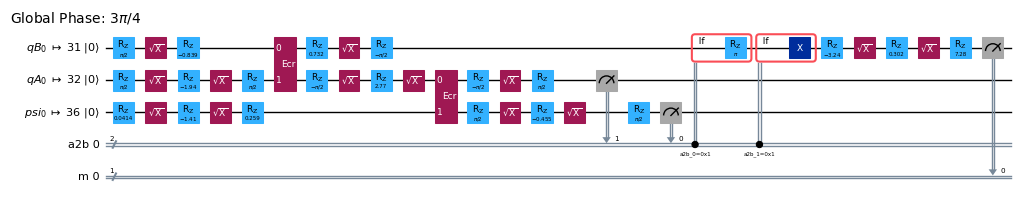

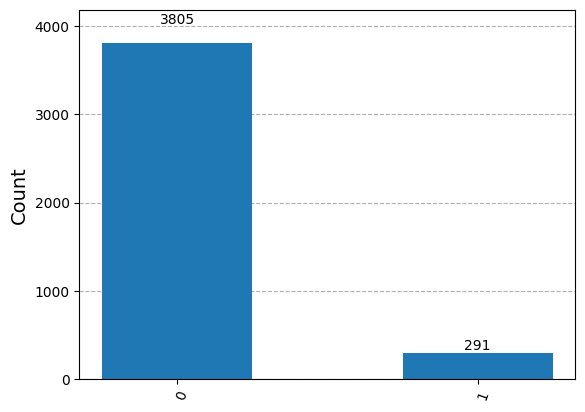

In [28]:
result_qpu=job_qpu.result()
from qiskit.visualization import plot_histogram
counts_qpu = result_qpu[0].data.m.get_counts()
display(qc00_qpu.draw('mpl',scale=0.5,initial_state=True, idle_wires=False, fold=-1))
display(plot_histogram(counts_qpu))